<a href="https://colab.research.google.com/github/CatIsOutOfTheBag/Probability_and_Statistics/blob/main/Stat_hypotheses_and_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проверка гипотез

P-значение (англ. P-value), p-уровень значимости, p-критерий — вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики (среднего арифметического, медианы и др.), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.

In [ ]:
import pandas as pd
import numpy as np

Допуситим, что удовлетворенность работой компании составляет 80%

Какова вероятность получить удовлетворенность 75% и ниже на выборке в 100 человек?

Возьмем модель распределения и сгенерируем из нее выборку.

В статистике такой подход к проверке тестов называется бутстрапом (Bootstrap), что так же является, по сути, методом Монте-Карло  - генерируются выборки и применяются.

In [ ]:
# сгенерируем 100 человек из распределения, где 80% довольны работой компании
np.random.binomial(1, 0.8, size=100).mean()

0.77

In [ ]:
# какова вероятность получить такие же и хуже результаты?
# запустим эксперимент множество раз и посчитаем
np.mean([np.random.binomial(1, 0.8, size=100).mean() <= 0.75 for _ in range(10000)])

0.1336

В данном случе 80% - нулевая гипотеза H0, альтернативная гипотеза, что удовлетворенность < 80% - H1
Проверка гипотезы происходит исходя из принятия гипотезы Н0

P_value - вероятность получить такие же и хучшие результаты при верной нулевой гипотезе.

Теперь проверим полученный результат статистическим тестом

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# сколько успехов в эксперименте /
# размер выборки /
# значение нулевой ипотезы /
# альтернатива - меньше нулевой гипотезы

proportions_ztest(75, 100, value=0.8, alternative='smaller') # увидим p-value

(-1.1547005383792526, 0.12410653949496159)

Посмотрим на p-values на гистограмме

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

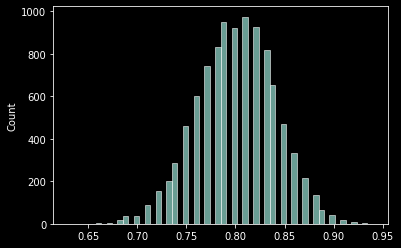

In [ ]:
sns.histplot([np.random.binomial(1, 0.8, size=100).mean() for _ in range(10000)])


In [ ]:
# Здесь мы видим, что среднее выборочное распределено нормально
# это следствие центральной предельной теоремы (используется в proportions_ztest)
# p_value мозно представлять себе как пощадь части фигуры, отсеченной влево от значения 0,75

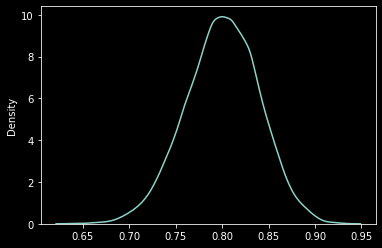

In [ ]:
# посмотрим на аппроксимацию гистограммы функцией
sns.kdeplot([np.random.binomial(1, 0.8, size=100).mean() for _ in range(10000)])


# A/B Тестирование

Предположим, что конверсия на текущем лендинге составляет 10%. Покажем новый лендин голько 30% клиентов

In [ ]:
df = pd.DataFrame({'group': ['old landing (A)', 'new_landing (B)'],
                   'lead': [700, 300], # сколько зашло клиентов в каждую группу 
                   'sale': [70, 48]}) # продажи в каждой группе

In [ ]:
# посчитаем конверсию старого/нового лэндинга - converging rate
df['cr'] = df['sale'] / df['lead']

In [ ]:
df # видим, что на новом лэндинге продажи выше

,group,lead,sale,cr
0,old landing (A),700,70,0.10
1,new_landing (B),300,48,0.16


In [ ]:
# но а вдруг это случайность?
# переформулируем:
# допустим, что между лэндингами нет разницы.
# какова вероятность получить различия? Такие и большие?

# генератор конвесии при условии, что разницы нет - при нулевой гипотезе
# (70 + 48) / 1000 = 0.118 - избавились от групп
# получили генератор, в котором вероятность конвертнуться составляет 11,8%

np.random.binomial(1,0.118, size=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# теперь из этого генератора мы можем получать выборки
# при чем тех же размеров, что и на реальном эксперименте
np.random.binomial(1,0.118, size=700).mean() # через среднее сразу увидим конверсию

0.11

In [ ]:
np.random.binomial(1,0.118, size=300).mean()

0.10333333333333333

In [ ]:
# новый лэндинг может быть как лучше, так и хуже
# и это нужно проверять
# двухсторонний тест
# тест покажет, что разница есть

abs(np.random.binomial(1,0.118, size=300).mean() - np.random.binomial(1,0.118, size=700).mean())

0.017142857142857154

In [ ]:
abs(0.1 - 0.16)

0.06

In [ ]:
# какова вероятность получить различия 0,06 или бОльшие?
[abs(np.random.binomial(1,0.118, size=300).mean() 
  - np.random.binomial(1,0.118, size=700).mean()) >= 0.06 for _ in range(10)]


[False, False, False, False, False, False, False, False, False, False]

In [ ]:
# вот здесь мы видим p_value - вероятность получить такие же и худщие результаты
# при верной нулевой гипотезе

np.mean([abs(np.random.binomial(1,0.118, size=300).mean() 
  - np.random.binomial(1,0.118, size=700).mean()) >= 0.06 for _ in range(10000)])

0.008

In [ ]:
# вывод:
# если предположение верно и разницы нет, то вероятность получить вот такие различия
# между выборками, пришедшими из одного распределения, очень мала

# Поскольку вероятность такая крошечная, гипотезу Н0 нужно отвергнуть = разница между лэндингами есть

Проверим хи-квадрат тестом на сайте калькулятора Эвана Миллера: 
https://www.evanmiller.org/ab-testing/

In [ ]:
df

,group,lead,sale,cr
0,old landing (A),700,70,0.10
1,new_landing (B),300,48,0.16


In [ ]:
# Так же можно провеить полученное значение p_value зитестом питона
# передаем в него:
# - количество успехов 1группа/2группа
# - размер выборки 1группа/2группа

proportions_ztest([70,48], [700,300]) # второе значени это пивэлью

(-2.695166510284625, 0.007035346384355496)

In [ ]:
# для двух групп зитест и хи-квадрат математически эквивалентны

Принятие решения об отвержении / принятии нулевой гипотезы на основе p_value

Используется порог=уровень значимости альфа

Заранее до проведения теста принимается решение при каком значении p_value принимается/отвергается нулевая гипотеза

Стандартное значение alpha = 0.05

p_value > 0.05 -> нулевая гипотеза принимается

В зависимости от бизнеса альфа может меняться

In [ ]:
'''
Жизненный пример нулевой гипотезы.
Нулевая гипотеза это презумпция невиновности.
Мы ищем доказательства вины.
Доказательствами служат такие события, вероятность которых при 
верной нулевой гипотезе стремится к нулю.
Так, вероятность того, что у невиновного человека дома найдут
вещественные доказательства преступления стремится к нулю
''';

In [ ]:
'''
Процедура проверки гипотезы это тест.
и тест может ошибаться
1) Н0 верна, а мы ее отвергли - ложное срабатывание - ошибка первого рода
2) Н0 неверна, а мы ее приняли - ошибка второго рода

Альфа - вероятность ошибки первого рода
Вероятность отвергнуть верную нулевую гипотезу
''';

In [ ]:
# посчитаем, действительно ли альфа = 0,05
# действительно ли вероятность после сдачи теста на коронавирус пометить
# здового человека, как больного (нулевая гипотеза что человек здоров)

# для этого возьмем те же два лэндинга, где выборки сгенерированы из одной модели распределения
# это случайные нолики и единички, с вероятностю единички(конверсии) 11,8%
# среднее покажет процент конверсии на выборке

a = np.random.binomial(1, 0.118, size=700).mean()
b = np.random.binomial(1, 0.118, size=300).mean()

# по сути мы проводим тест для двух одинаковых сущностей

In [ ]:
# теперь посчитаем разницу между этими двумя группами:
diff = abs(a-b)

In [ ]:
diff

0.038095238095238085

In [ ]:
# посчитаем p_value для этой разницы - 
# какова вероятность получить вот такую разницу и больше?
np.mean([abs(np.random.binomial(1,0.118, size=300).mean() 
- np.random.binomial(1,0.118, size=700).mean()) >= diff for _ in range(10000)])


0.0877

In [ ]:
# повторим этот тест множество раз
from tqdm.notebook import tqdm # progress bar

n = 1000
result = []

for _ in tqdm(range(n)):
  a = np.random.binomial(1, 0.118, size=700).mean()
  b = np.random.binomial(1, 0.118, size=300).mean()
  diff = abs(a-b)
  pval = np.mean([abs(np.random.binomial(1,0.118, size=300).mean() 
  - np.random.binomial(1,0.118, size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
result[:10]

[0.948, 0.576, 0.409, 0.626, 0.479, 0.414, 0.642, 0.175, 0.105, 0.706]

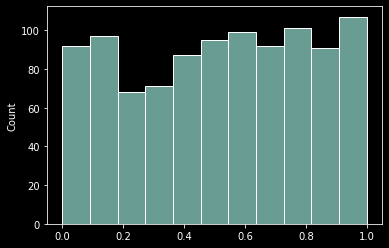

In [ ]:
sns.histplot(result)

In [ ]:
# видим, что на двух выборках, между которыми нет разницы(одинаковая конверсия)
# p_value распределен равномерно


In [ ]:
# посморим, 
# если отвергать нулевую гипотезу при p_value < 0,05,
# сколько процентов верных нулевых гипотез я отвергну?

(np.array(result)<0.05).mean()

# увидим, что эта доля близка именно к 0,05
# ВАЖНО:
# мы всегда будем получать 5% ошибок при верной нулевой гипотезе
# так как мы получаем такой результат даже на двух выборках БЕЗ РАЗЛИЧИЙ


0.046

Интересный факт о равномерности распределения p_value

In [ ]:
# возьмем нормальное распределение
df = pd.DataFrame(np.random.normal(size=1000))

In [ ]:
df

,0
0,1.187241
1,0.592260
2,1.582249
3,-0.523119
4,0.021434
...,...
995,1.277562
996,0.719178
997,2.021403
998,-0.890883


In [ ]:
# отсортируем по убыванию
df = df.sort_values(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eecf90b90>]],
      dtype=object)

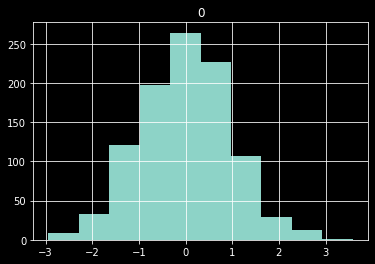

In [ ]:
df.hist()

In [ ]:
# создадим столбец нумератор
df['count'] = range(1,1001)
df

,0,count
834,-2.939216,1
347,-2.790563,2
39,-2.701761,3
591,-2.689355,4
262,-2.576208,5
...,...,...
846,2.590292,996
702,2.696403,997
570,2.898241,998
114,2.914856,999


In [ ]:
# поделим на общее количество наблюдений
# получим процент наблюдений, который меньше значения в строке таблицы
# это будет p_value для элементов таблицы
# т.е. 1/1000 - доля наблюдений, которая меньше самого маленького значения
# 2/1000 - меньше второго по величине наблюдения

df['pct'] = df['count'] / 1000
df

,0,count,pct
834,-2.939216,1,0.001
347,-2.790563,2,0.002
39,-2.701761,3,0.003
591,-2.689355,4,0.004
262,-2.576208,5,0.005
...,...,...,...
846,2.590292,996,0.996
702,2.696403,997,0.997
570,2.898241,998,0.998
114,2.914856,999,0.999


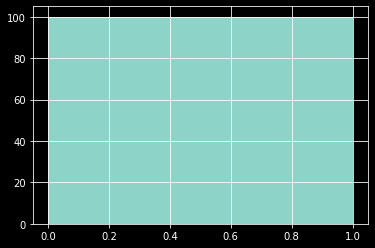

In [ ]:
# смотрим на распределение этого pct (p_value - вероятности получить такое же или меньшее значение)
df['pct'].hist()

# видим равномерное распределение
# Вывод:
# в основе равномерности распределения p_value для двух выборок, полученных из одной модели распределения,
# лежит нормальное распределение, а в его основе, соответственно - центральная пределтная теорема


In [ ]:
 '''
 Мощность - значение, обратное ошибке второго рода (1 - ошибка2рода)
 = процент случаев, в которм нулевая гипотеза не верна и тест правильно определил ее как неверную
 Сколько процентов действиельно больных коронавирусом людей тест промечает, как больных,
 при условии что нулевая гипотеза в том, что человек здоров
 Мощность - это recall
 Мощность определяется до проведения статистического теста
 ''';

Мощность стат теста можно решить через sample size calculator Эвана Миллера
Ввести базовую конверсию и процент различий, которые мы хотим задетектить. Калькулятор покажет требуемый размер выборки.

По умолчанию в калькуляторе стоит 80% - процент случаев,  в которых мы хотим верно определять, что нулевая гипотеза не верна.
Чем больше этот процент, тем больше наблюдений нам понадобится.

При этом чем меньше разница между двумя гипотезами (процент различий MDE - minimum detectable effect) - тем больше необходимая выборка

Таким образом тут настраивается несколько параметров - урвень значимости альфа, мощность(процент правильно отвергнутых случаев), размер выборок

In [ ]:
# Посчитаем пощночть вышеописанного теста
# выборки будут сгенерированы из разных распределений
# нулевая гипотеза об одинаковости НЕ верна
# мы должны ее отвергнуть

n = 1000
result = []

for _ in tqdm(range(n)):
  a = np.random.binomial(1, 0.10, size=700).mean()
  b = np.random.binomial(1, 0.12, size=300).mean()
  diff = abs(a-b)
  pval = np.mean([abs(np.random.binomial(1,0.118, size=300).mean() 
  - np.random.binomial(1,0.118, size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# получим набор p_values, где нулевая гипотеза не верна
result[:10]

[0.992, 0.635, 0.046, 0.208, 0.295, 0.619, 0.774, 0.614, 0.01, 0.333]

In [ ]:
# при альфа=0,05 в скольки случаях мы правильно определим,
# что нулевую гипотез нужно отвергнуть?
(pd.Series(result) < 0.05).mean() # это и будет наша мощность

0.135

In [ ]:
# при таких выборках, если мы хотим детектить разницу (0,12-0,10) ,
# мощность получается маленькая
# если увеличить разницу, мощность вырастет

n = 1000
result = []

for _ in tqdm(range(n)):
  a = np.random.binomial(1, 0.10, size=700).mean()
  b = np.random.binomial(1, 0.15, size=300).mean()
  diff = abs(a-b)
  pval = np.mean([abs(np.random.binomial(1,0.118, size=300).mean() 
  - np.random.binomial(1,0.118, size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
(pd.Series(result) < 0.05).mean() 

0.592

In [ ]:
# можно посчитать математической моделью
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.592, alpha=0.05, ratio=3/7)
# power - мощность, которую хотим получить
# ratio - отношение размеров выборок

694.5455792629175

In [ ]:
# получаем размер, необходимый для бОльшей выборки

In [ ]:
# при 80% и равных мощностях выборок, какой получим размер каждой выборки
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1)


680.3526619127882

In [ ]:
# проверим зитестом

n = 1000
result = []

for _ in tqdm(range(n)):
  a = np.random.binomial(1, 0.10, size=680)
  b = np.random.binomial(1, 0.15, size=680)
  _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
(pd.Series(result) < 0.05).mean() 

0.79

In [ ]:
# получаем ту самую дефолтную мощность 80%